In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('seaborn')


In [2]:
dp = pd.read_csv("FashionData/fashion-mnist_train.csv")
data = dp.values
data = data[:400,:]


In [3]:
# print(data[10])
dt = np.array(data)
np.random.shuffle(dt)
# print(data.shape)

Y = dt[:,0]
X = dt[:,1:]
print(X.shape)
print(Y.shape)
# print(X[1000])
# print(Y[1000])

x_train=np.array(X)
y_train= np.array(Y)
print(x_train.shape)
print(y_train.shape)

(400, 784)
(400,)
(400, 784)
(400,)


In [4]:
def sigmoid(z):
    
    return 1.0/(1.0 + np.exp(-1.0*z))

def hypo(x,w,b):
    
    h = np.dot(x,w) + b
    
    return sigmoid(h)

def error(y_true,x,w,b):
    
    m = x.shape[0]
    err=0.0
    
    for ix in range(m):
        hx = hypo(x[ix],w,b)
#         err += y_true[ix]*np.log2(hx) + (1-y_true[ix])*np.log2(1-hx)
        
     
    return -err/m

def get_grad(y_true,x,w,b):
    
    grad_w=np.zeros(x.shape[1])
    grad_b=0.0
    
    m= x.shape[0]
    n= x.shape[1]
    for i in range(m):
        for j in range(n):
            hx = hypo(x[i],w,b)
        
            grad_w[j] += -1*(y_true[i] - hx)*x[i][j]
            grad_b += -1*(y_true[i] - hx)
        
        
    grad_w /=m
    grad_b /=m
    
    return [grad_w, grad_b]

def grad_Descent(x,y_true,w,b,lr):
    
#     err=error(y_true,x,w,b)
    
    [grad_w,grad_b] = get_grad(y_true,x,w,b)
    for i in range(w.shape[0]):
             w[i] = w[i] - lr*grad_w[i]
    b = b - lr*grad_b
   
    
    return w,b


In [6]:
print(y_train)
y_unik = np.unique(y_train)
ws = []
bs = []
print(y_unik)
for ix in y_unik:
    y_true = np.array(Y)

    
    y_true[y_true==ix] = 20
    y_true[y_true!=20] = 30

    y_true[y_true==20] = 1
    y_true[y_true==30] = 0
    x_true = X[:]
    
    W = 3*np.random.random(x_train.shape[1],)
    B = 5*np.random.random()

    for iy in range(10):
        W,B=grad_Descent(x_true,y_true,W,B,lr=0.5)
    
#     thetas[ix][0] = B[0]
    
#     for iz in range(1,thetas.shape[1]):
#         thetas[ix][iz]=W[iz-1]

    ws.append(W)
    bs.append(B)
    
   
    

[9 8 6 8 5 2 1 9 3 6 1 0 6 4 4 9 4 0 6 2 8 0 9 4 6 3 3 4 0 7 1 6 1 8 9 1 7
 0 7 2 6 6 6 7 1 9 1 5 4 4 4 5 5 9 8 1 2 7 4 7 6 4 6 8 4 5 7 9 5 9 8 0 6 0
 2 9 4 2 0 0 8 3 3 1 5 4 6 6 1 4 3 6 5 8 2 4 7 3 3 8 8 6 2 3 7 0 4 1 2 7 7
 5 9 6 3 4 8 0 3 5 6 6 6 4 6 3 7 3 4 4 6 4 5 5 5 9 3 2 3 3 6 4 7 1 6 0 5 1
 7 1 9 4 4 6 6 8 7 3 8 6 1 6 8 0 4 7 2 4 5 0 7 6 9 1 2 7 3 8 9 1 8 4 6 8 6
 7 6 3 2 4 8 4 8 0 4 8 5 8 7 0 3 4 0 9 3 9 0 9 2 4 6 9 5 0 3 2 6 9 0 4 9 3
 9 9 6 3 0 1 5 8 6 3 0 2 5 7 7 3 9 8 2 7 2 3 3 4 3 9 3 3 1 5 3 0 4 9 3 0 0
 1 7 3 3 8 7 9 0 9 3 3 2 1 5 8 1 4 9 2 8 5 6 2 6 2 0 8 6 0 2 8 9 0 0 5 5 9
 5 1 4 0 3 4 7 3 2 6 6 8 7 3 2 7 9 1 1 7 9 7 5 8 8 3 1 1 9 1 4 1 6 0 5 7 7
 1 3 8 0 9 2 8 7 2 7 4 3 5 7 5 5 5 6 4 6 2 2 7 4 6 4 7 2 2 7 2 0 8 9 3 8 5
 3 2 6 8 6 3 3 6 2 0 5 2 4 8 7 7 7 5 7 9 2 2 8 5 9 1 2 3 3 5]
[0 1 2 3 4 5 6 7 8 9]


/home/arif/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
ws = np.array(ws)
bs = np.array(bs)
print(ws.shape)
# print(ws[0].shape)
print(bs.shape)
y_unik = np.unique(y_train)
print(y_unik.shape[0])
print(y_unik)

print(ws)
# print(ws)

(10, 784)
(10,)
10
[0 1 2 3 4 5 6 7 8 9]
[[ 0.57040171  0.16268895  0.66753193 ...  3.43267055  2.70132611
   3.01045208]
 [ 2.42350469  1.64099234  1.58835672 ...  3.72872853  0.43548334
   0.81791014]
 [ 2.43016949  0.97652305  1.01545894 ... -2.87025347  2.82011364
   3.01240416]
 ...
 [ 2.065157    2.58579202  2.17969521 ...  2.33192184  1.88431563
   0.58610445]
 [ 0.26424213  2.80780452  0.66748118 ...  1.03437816  2.04430919
   2.55268372]
 [ 1.47046497  1.78835284  0.49197328 ... -1.00388164 -1.35422888
   0.50422701]]


In [8]:
def draw(x):
    image=x.reshape((28,28))
    plt.imshow(image,cmap='gray')
    
class_table = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

class_table[2]


'Pullover'

Sneaker
(784,)
7


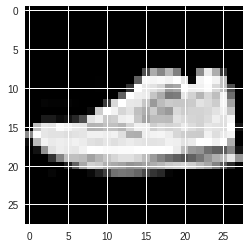

In [17]:
##Query for Manual Testing
x = x_train[340]
x = np.array(x)

y = y_train[340]

draw(x)
print(class_table[y])

print(x.shape)
print(y)

In [18]:
##Predicting

def predict(x):
    prob=[]
    
    for i in range(bs.shape[0]):
        pro = hypo(x,ws[i],bs[i])
        prob.append(pro)
        
    
    prob=np.array(prob)
#     max = np.max(prob)
    
#     index = np.where(max)
    ind = np.argmax(prob)
    print(ind)
    print(class_table[ind])

In [19]:
print(x.shape , y.shape , ws[2].shape , bs[2].shape)
predict(x)
# print(bs.shape[0])

((784,), (), (784,), ())
0
T-shirt/top
